In [10]:
from __future__ import division
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np

In [11]:
def show(image):
  # Figure size in inches
  plt.figure(figsize=(15, 15))

# Show image, with nearest neighbour interpolation
  plt.imshow(image, interpolation='nearest')

def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)

def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')

def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [12]:
image=cv2.imread('strawberries.png')

In [13]:
if image is None:
    print("it is null")

In [14]:
image.shape

(590, 874, 3)

In [15]:
image=cv2.imread('strawberries.png')

In [16]:
image.shape

(590, 874, 3)

In [17]:
import pandas as pd
m,n,r=image.shape
arr=image.reshape(m*n,-1)
df=pd.DataFrame(arr,columns=['b','g','r'])
df.describe()

,b,g,r
count,515660.000000,515660.000000,515660.000000
mean,77.656785,116.265343,122.368087
std,63.789799,60.479726,59.586003
min,0.000000,0.000000,0.000000
25%,37.000000,78.000000,87.000000
50%,63.000000,114.000000,112.000000
75%,91.000000,144.000000,141.000000
max,255.000000,255.000000,255.000000


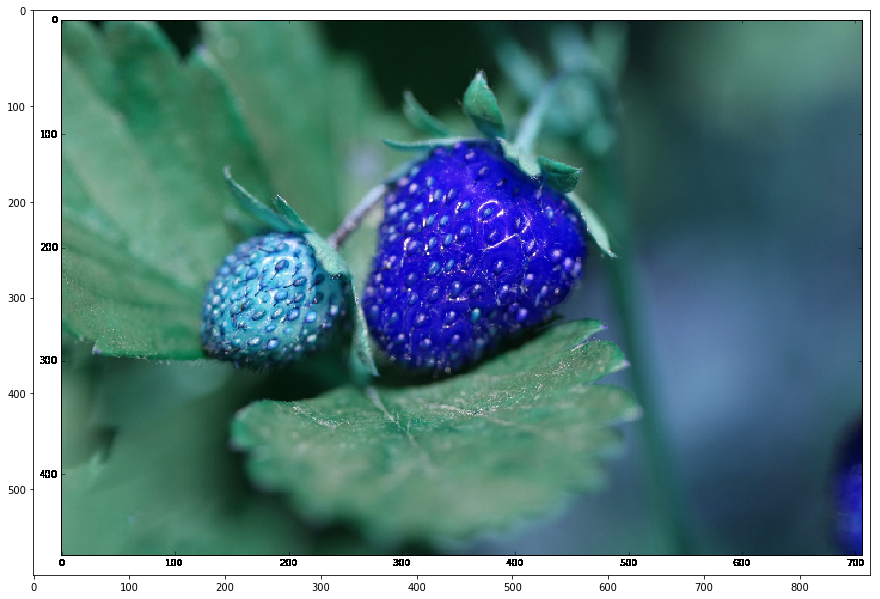

In [18]:
show(image)

In [19]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.resize(image,None,fx=1/3,fy=1/3)

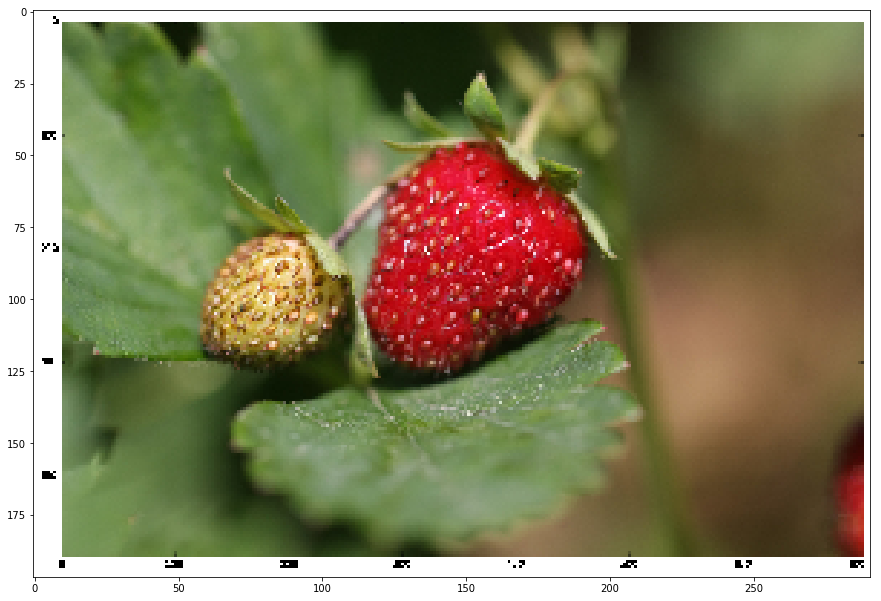

In [20]:
show(image)

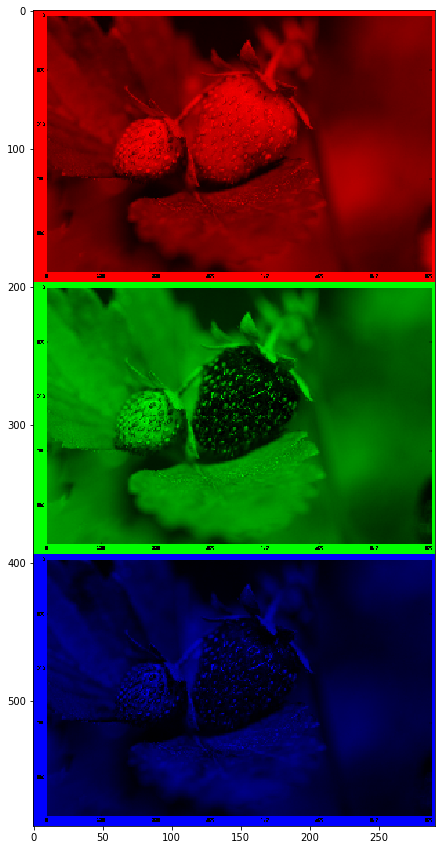

In [21]:
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)

show(np.vstack(images))

TypeError: only size-1 arrays can be converted to Python scalars

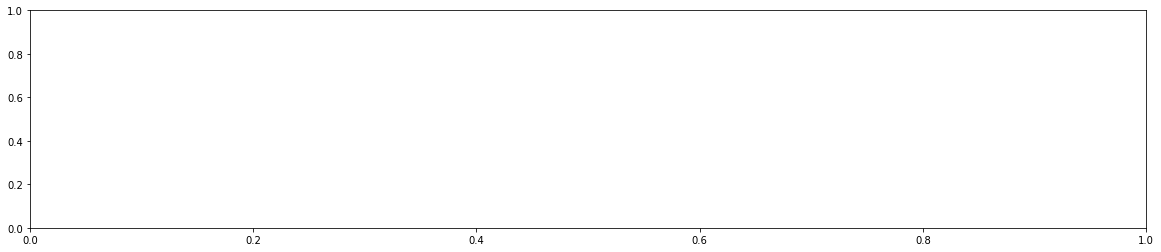

In [22]:
def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
#        plt.plot(histr, color=c, lw=2)

        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]

        plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
#        plt.xlim([0, 256])

        plt.show()

show_rgb_hist(image)

In [ ]:
#convert from rgb to hsv

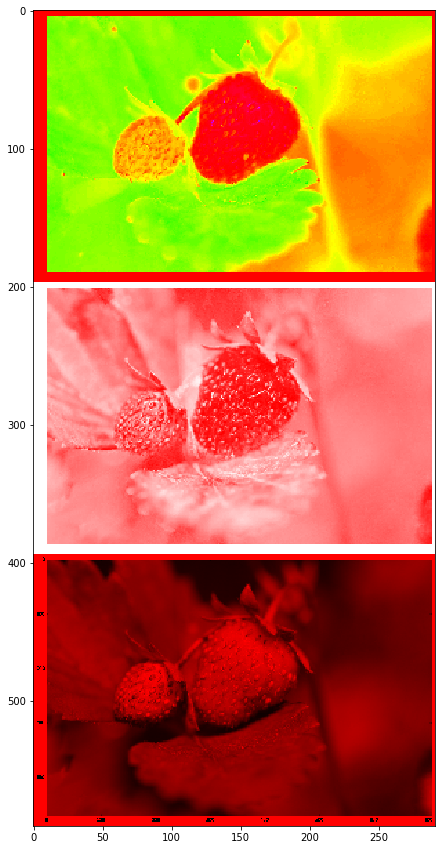

In [23]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)

hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

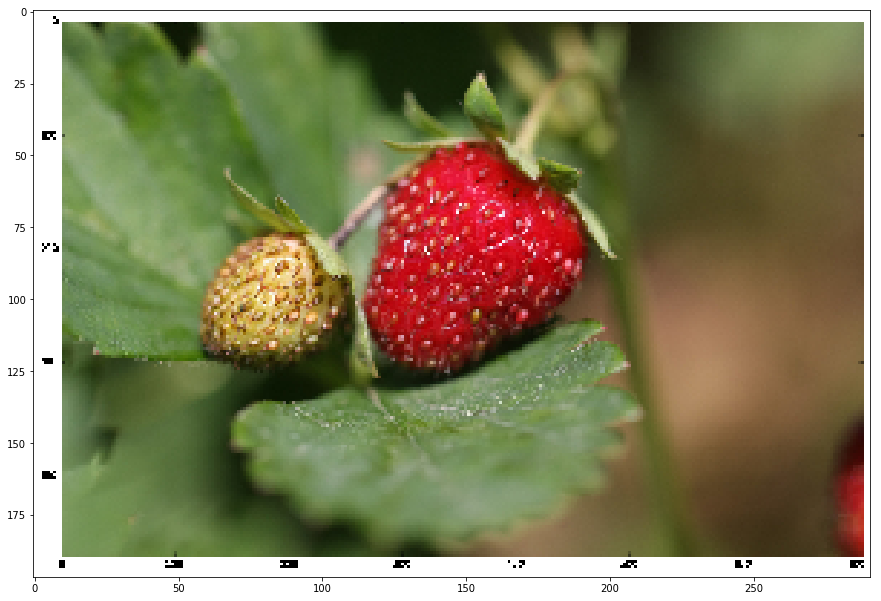

In [24]:
show(image)

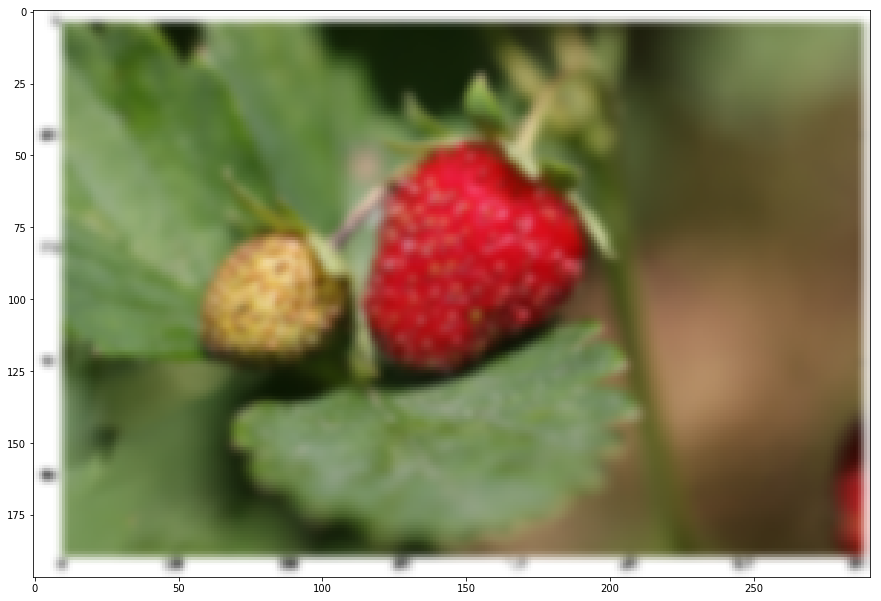

In [25]:
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

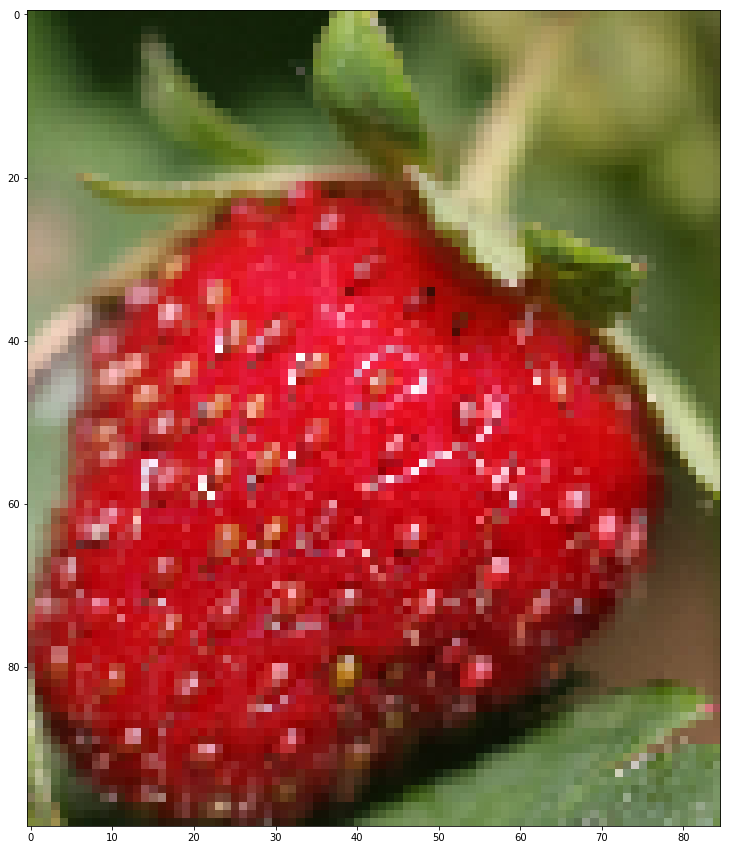

In [26]:
image_cropped=image[25:125,115:200]
show(image_cropped)

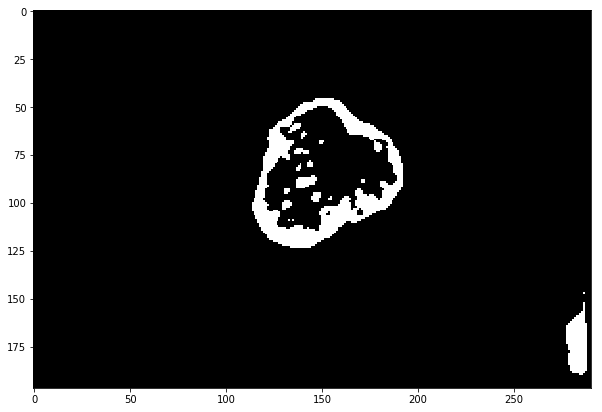

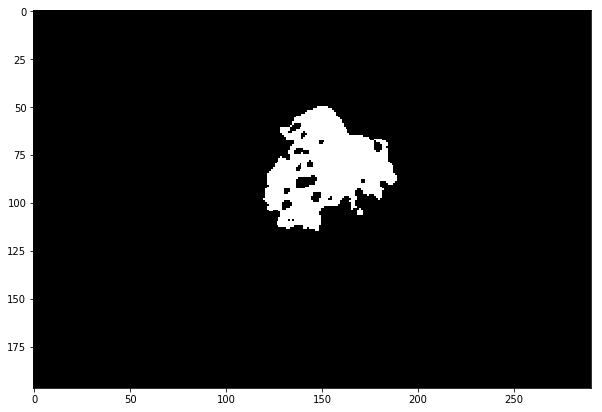

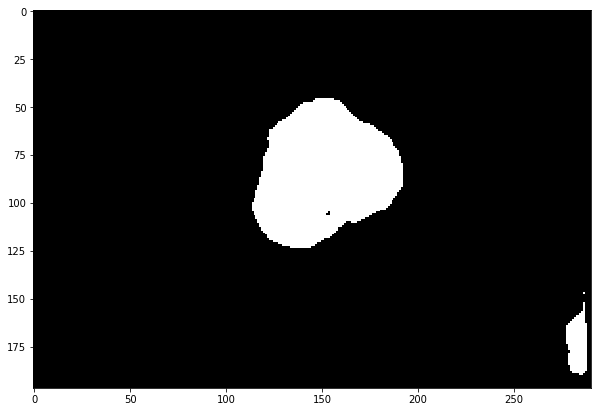

In [27]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([170, 100, 80])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)

In [40]:
image_red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

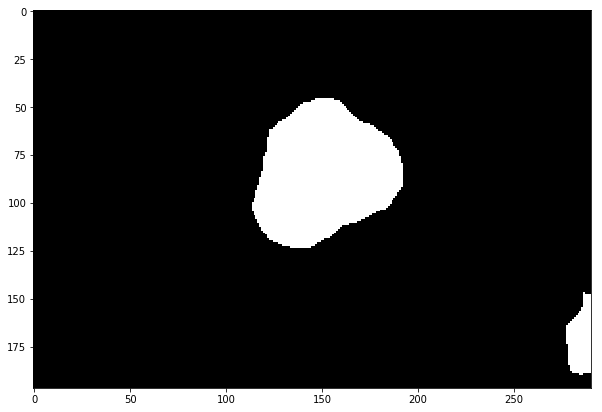

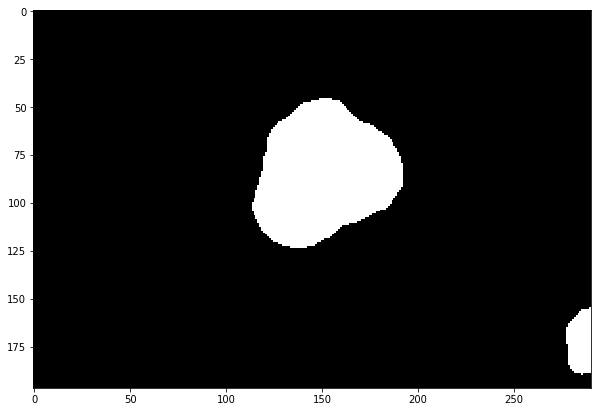

In [41]:
#cleanup
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
# show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

In [46]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    contours,hierarchy= cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print (len(contours))

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour,red_mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(red_mask)

3


error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\shapedescr.cpp:272: error: (-215) npoints >= 0 && (depth == 5 || depth == 4) in function cv::contourArea


In [32]:
overlay_mask(red_mask,image)

NameError: name 'red_mask' is not defined

In [38]:
# Centre of mass
moments = cv2.moments(red_mask)
centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
image_with_com = image.copy()
cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1, cv2.LINE_AA)
show(image_with_com)

# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)

NameError: name 'red_mask' is not defined